In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [17]:
# Load the dataset
data = pd.read_csv("car_evaluation.csv")
data.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [18]:
# Convert categorical data into numerical using pd.get_dummies (One-Hot Encoding)
data_encoded = pd.get_dummies(data, drop_first=True)

In [19]:
# Define the features (X) and the target (y)
X = data_encoded.drop('unacc_vgood', axis=1)  # Assuming the 'class' column is the target
y = data_encoded['unacc_vgood']


In [20]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.96242775 0.96242775 0.91304348 0.94492754 0.86376812]
Mean Cross-Validation Score: 0.9293189243528526


In [23]:
# Predict the test set results
y_pred = rf_classifier.predict(X_test)

In [24]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 98.27%
Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       329
        True       0.87      0.76      0.81        17

    accuracy                           0.98       346
   macro avg       0.93      0.88      0.90       346
weighted avg       0.98      0.98      0.98       346



In [25]:
# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.87
Recall: 0.76
F1-Score: 0.81


In [26]:
# Feature Importance
importances = rf_classifier.feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

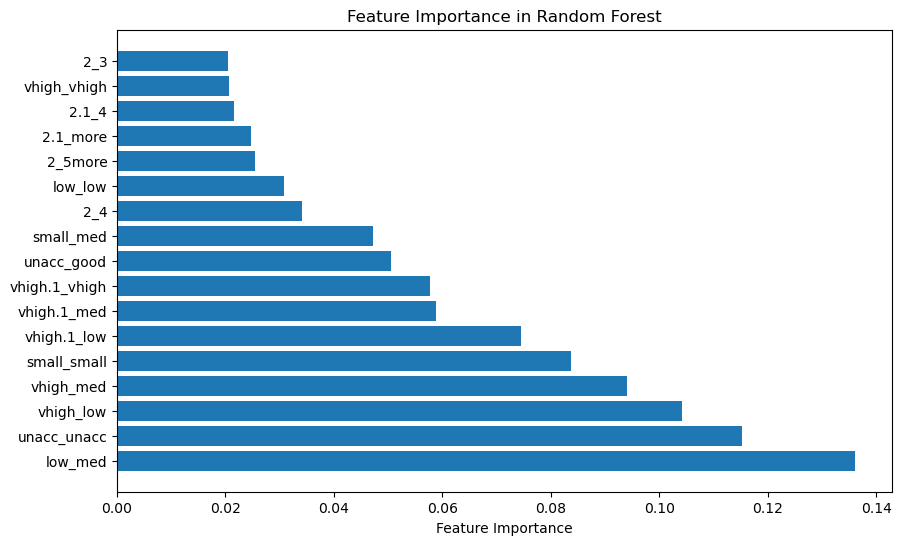

In [27]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), importances[sorted_indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()


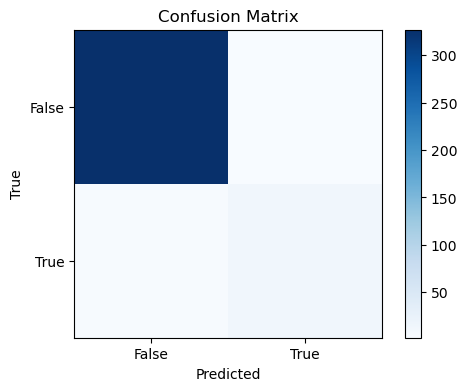

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap='Blues', interpolation='none',__annotations__=True)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()